# LOADING AND PREPROCESSING DATA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
raw = pd.read_csv('/content/drive/MyDrive/dataset2/dataset.csv')
raw.head(15)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [ ]:
languages = set(raw['language'])
print('Languages', languages)
print('Number of languages--->',len(languages))

Languages {'Arabic', 'Pushto', 'Thai', 'Spanish', 'English', 'Estonian', 'Indonesian', 'Persian', 'Portugese', 'Dutch', 'Russian', 'Tamil', 'Latin', 'Hindi', 'Romanian', 'Korean', 'Chinese', 'Swedish', 'Urdu', 'Japanese', 'Turkish', 'French'}
Number of languages---> 22


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import re
X=raw['Text']
y=raw['language']
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case

print(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Possible nested set at position 1
  


0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas  på eng the jesuit...
2        ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3        விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
21995    hors du terrain les années  et  sont des année...
21996    ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997    con motivo de la celebración del septuagésimoq...
21998    年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...
21999     aprilie sonda spațială messenger a nasa și-a ...
Name: Text, Length: 22000, dtype: object


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


17600
4400
17600
4400


# FEATURE SET EXTRACTION


In [ ]:
# Extract Unigrams
from sklearn.feature_extraction.text import CountVectorizer
unigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)


unigramFeatures = unigramVectorizer.get_feature_names()

print('Number of unigrams in training set:', len(unigramFeatures))

Number of unigrams in training set: 6816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Aggregate Unigrams per language
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

# Collect relevant chars per language
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    relevantCharsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantCharsPerLanguage[lang] = chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
    return relevantCharsPerLanguage

relevantCharsPerLanguage = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)
    
# Print number of unigrams per language
for lang in languages:    
    print(lang, len(relevantCharsPerLanguage[lang]))

Arabic 97
Pushto 188
Thai 148
Spanish 66
English 60
Estonian 96
Indonesian 75
Persian 98
Portugese 64
Dutch 58
Russian 85
Tamil 113
Latin 132
Hindi 117
Romanian 109
Korean 1407
Chinese 3249
Swedish 77
Urdu 142
Japanese 2054
Turkish 121
French 70


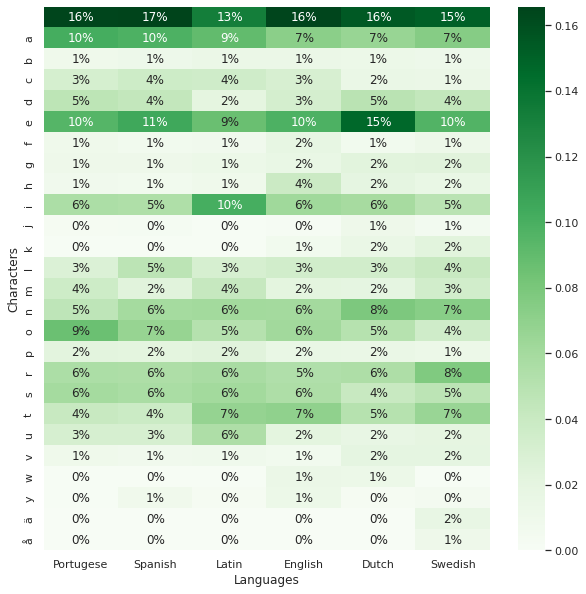

In [ ]:
# get most common chars for a few European languages
europeanLanguages = ['Portugese', 'Spanish', 'Latin', 'English', 'Dutch', 'Swedish']
relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)

# collect and sort chars
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# build data
indices = [unigramFeatures.index(f) for f in europeanCharacters]
data = []
for lang in europeanLanguages:
    data.append(language_dict_unigram[lang][indices])

#build dataframe
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# plot heatmap
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.8) # for label size
sn.set(rc={'figure.figsize':(10, 10)})
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='.0%')# font size
plt.show()

In [ ]:
# number of bigrams
from sklearn.feature_extraction.text import CountVectorizer
bigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
X_bigram_raw = bigramVectorizer.fit_transform(X_train)
bigramFeatures = bigramVectorizer.get_feature_names()
print('Number of bigrams', len(bigramFeatures))

Number of bigrams 147219


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), min_df=1e-2)
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names()
print('Length of features', len(top1PercentFeatures))
print('')

#Unique features per language
relevantChars_Top1Percent = getRelevantCharsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantChars_Top1Percent:
    print("{}: {}".format(lang, len(relevantChars_Top1Percent[lang])))

Length of features 3079

Arabic: 680
Pushto: 980
Thai: 719
Spanish: 528
English: 488
Estonian: 624
Indonesian: 496
Persian: 664
Portugese: 542
Dutch: 527
Russian: 536
Tamil: 517
Latin: 557
Hindi: 572
Romanian: 532
Korean: 726
Chinese: 716
Swedish: 546
Urdu: 838
Japanese: 897
Turkish: 597
French: 518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def getRelevantGramsPerLanguage(features, language_dict, top=50):
    relevantGramsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        sortIndex = (-v).argsort()[:top]
        for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])
    return relevantGramsPerLanguage

top50PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# top50
allTop50 = []
for lang in top50PerLanguage_dict:
    allTop50 += set(top50PerLanguage_dict[lang])

top50 = list(set(allTop50))
    
print('All items:', len(allTop50))
print('Unique items:', len(top50))

All items: 1100
Unique items: 564


In [ ]:
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    for feature in selectedFeatures:
        relevantColumns = np.append(relevantColumns, np.where(allFeatures==feature))
    return relevantColumns.astype(int)

relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top50)


X_top50_train_raw = np.array(X_top1Percent_train_raw.toarray()[:,relevantColumnIndices])
X_top50_test_raw = X_top1Percent_test_raw.toarray()[:,relevantColumnIndices] 

print('train shape', X_top50_train_raw.shape)
print('test shape', X_top50_test_raw.shape)

train shape (17600, 564)
test shape (4400, 564)


# NAIVE BAYES

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

# Utils for conversion of different sources into numpy array
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data_type)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None


def normalizeData(train, test):
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

def applyNaiveBayes(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = MultinomialNB()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict

def plot_F_Scores(y_test, y_predict):
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sn.set(font_scale=0.8) # for label size
    sn.set(rc={'figure.figsize':(15, 15)})
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()

F1: 0.9245454545454546 (micro), 0.9228036807514023 (macro), 0.9201996483569281 (weighted)


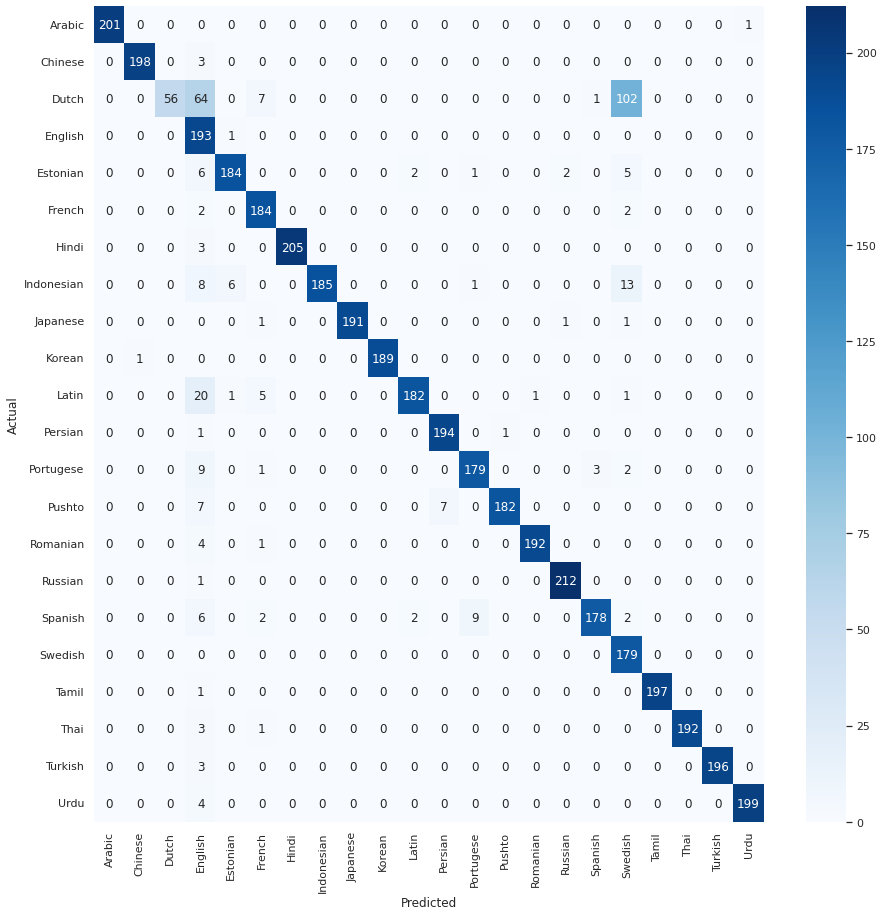

In [ ]:
# Unigrams
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_nb_unigram)

plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Blues")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_predict_nb_unigram)
print(ac)

0.9245454545454546


F1: 0.9736363636363636 (micro), 0.9746014171936572 (macro), 0.9746025107937131 (weighted)


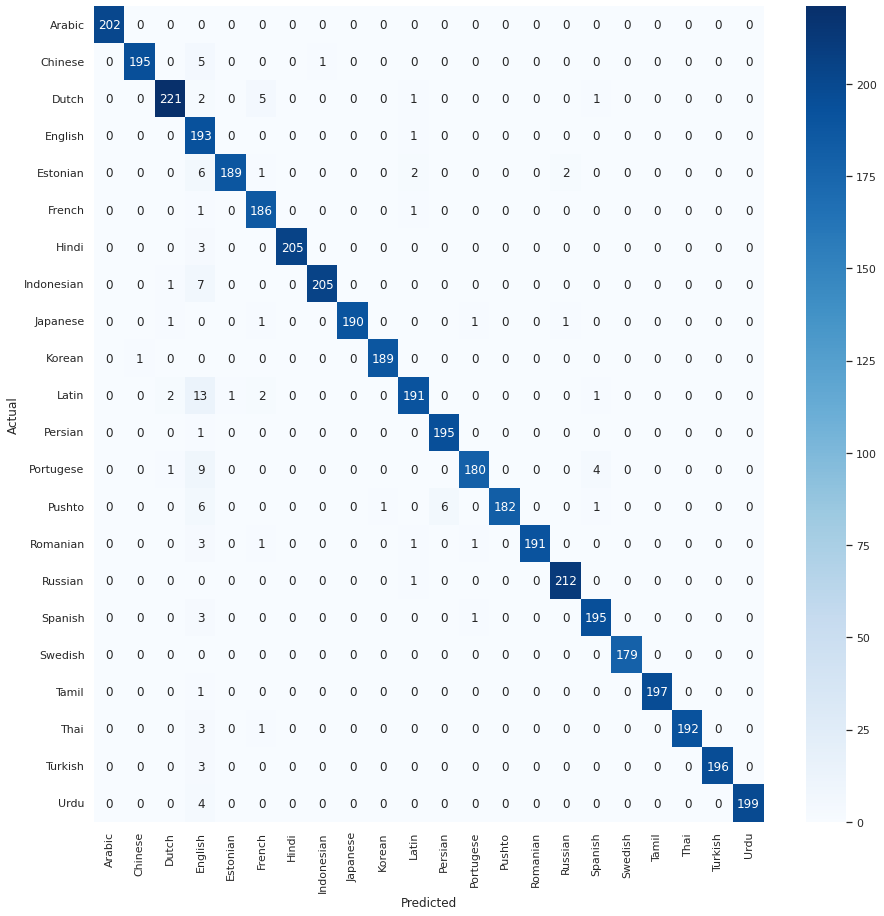

In [ ]:
# Top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
y_predict_nb_top1Percent = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test)
plot_F_Scores(y_test, y_predict_nb_top1Percent)
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Blues")

In [ ]:
ac = accuracy_score(y_test, y_predict_nb_top1Percent)
print(ac)

0.9736363636363636


F1: 0.9743181818181819 (micro), 0.9750576649746047 (macro), 0.9751510056992273 (weighted)


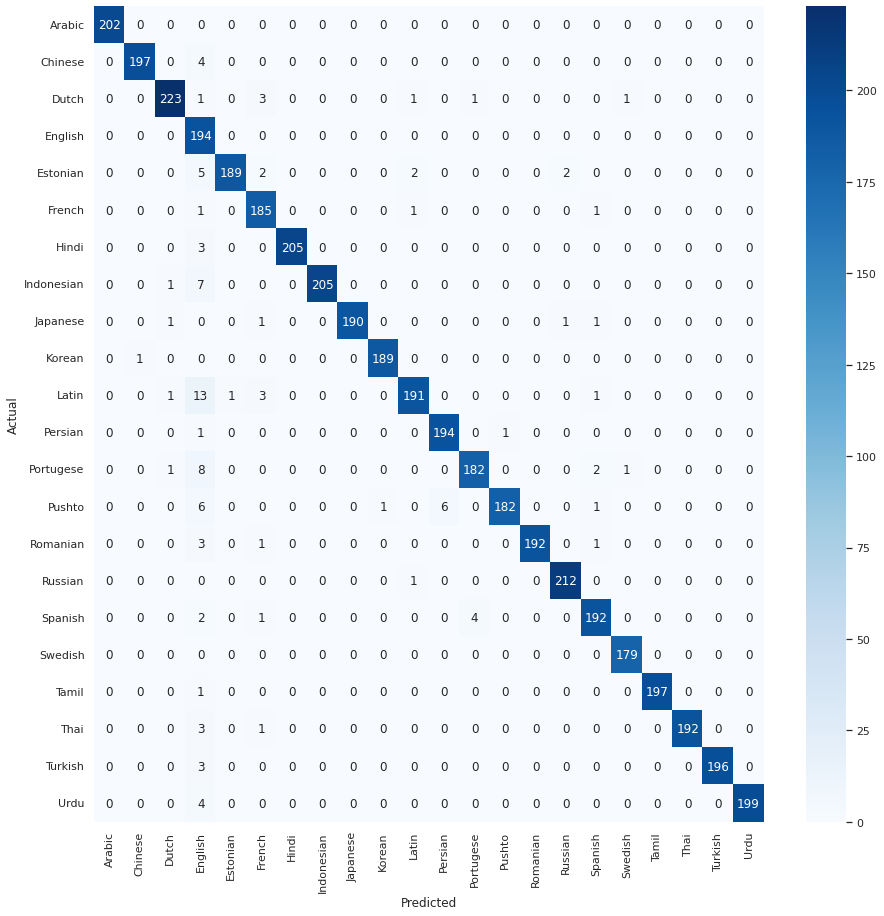

In [ ]:
# Top 50
X_top50_train, X_top50_test = normalizeData(X_top50_train_raw, X_top50_test_raw)
y_predict_nb_top50 = applyNaiveBayes(X_top50_train, y_train, X_top50_test)
plot_F_Scores(y_test, y_predict_nb_top50)
plot_Confusion_Matrix(y_test, y_predict_nb_top50, "Blues")

In [ ]:
ac = accuracy_score(y_test, y_predict_nb_top50)
print(ac)

0.9743181818181819


# KNN

F1: 0.9538636363636362 (micro), 0.9545871978993322 (macro), 0.9545028869296119 (weighted)


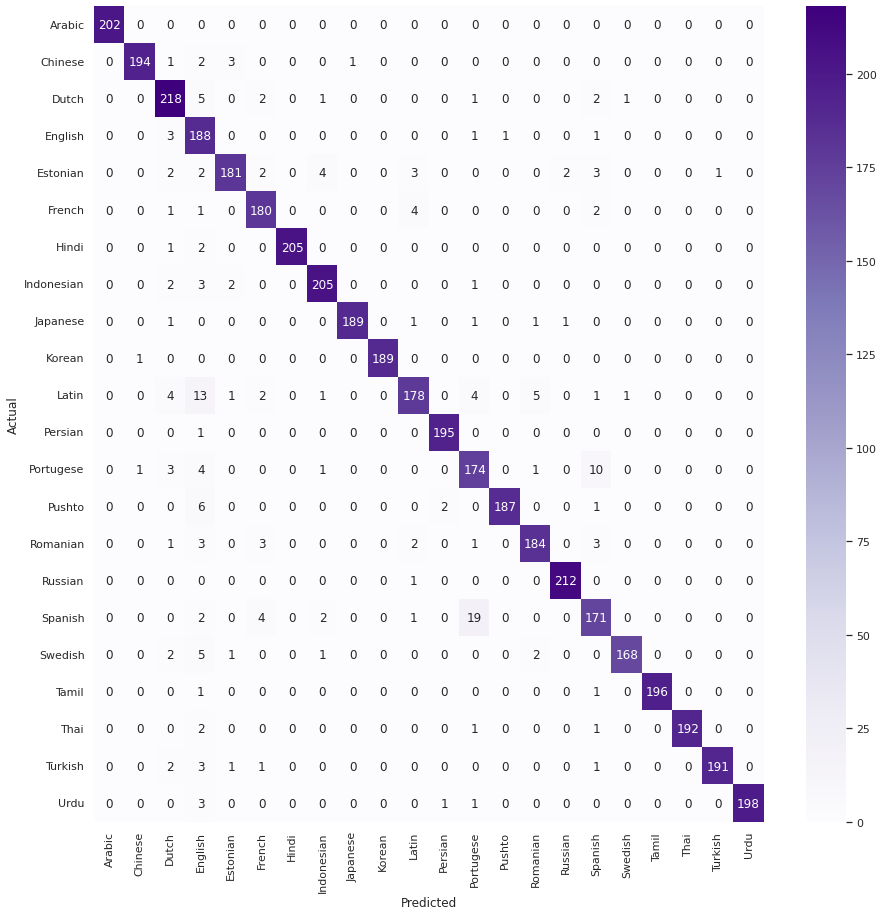

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict


## Unigrams
y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")



In [ ]:
ac = accuracy_score(y_test, y_predict_knn_unigram)
print(ac)

0.9538636363636364


F1: 0.9718181818181818 (micro), 0.972332850602477 (macro), 0.972350612063613 (weighted)


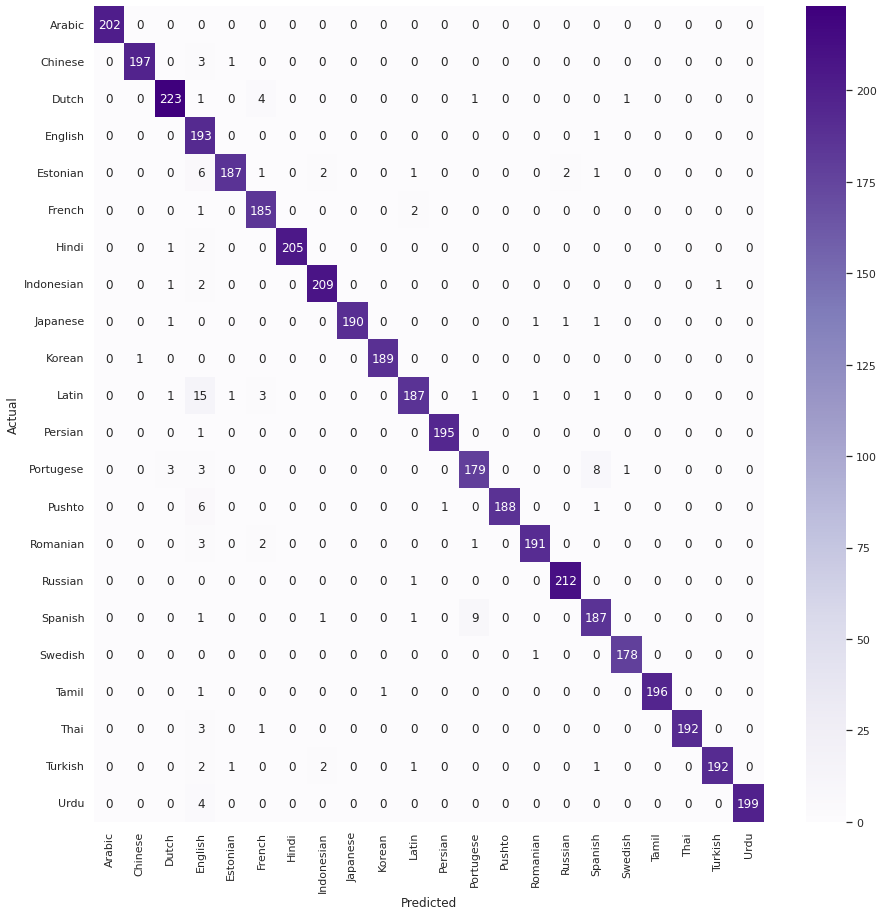

In [ ]:
# Top 50
y_predict_knn_top50 = applyNearestNeighbour(X_top50_train, y_train, X_top50_test)
plot_F_Scores(y_test, y_predict_knn_top50)
plot_Confusion_Matrix(y_test, y_predict_knn_top50, "Purples")

In [ ]:
ac = accuracy_score(y_test, y_predict_knn_top50)
print(ac)

0.9718181818181818


F1: 0.9734090909090909 (micro), 0.9739196854334693 (macro), 0.9739276244435526 (weighted)


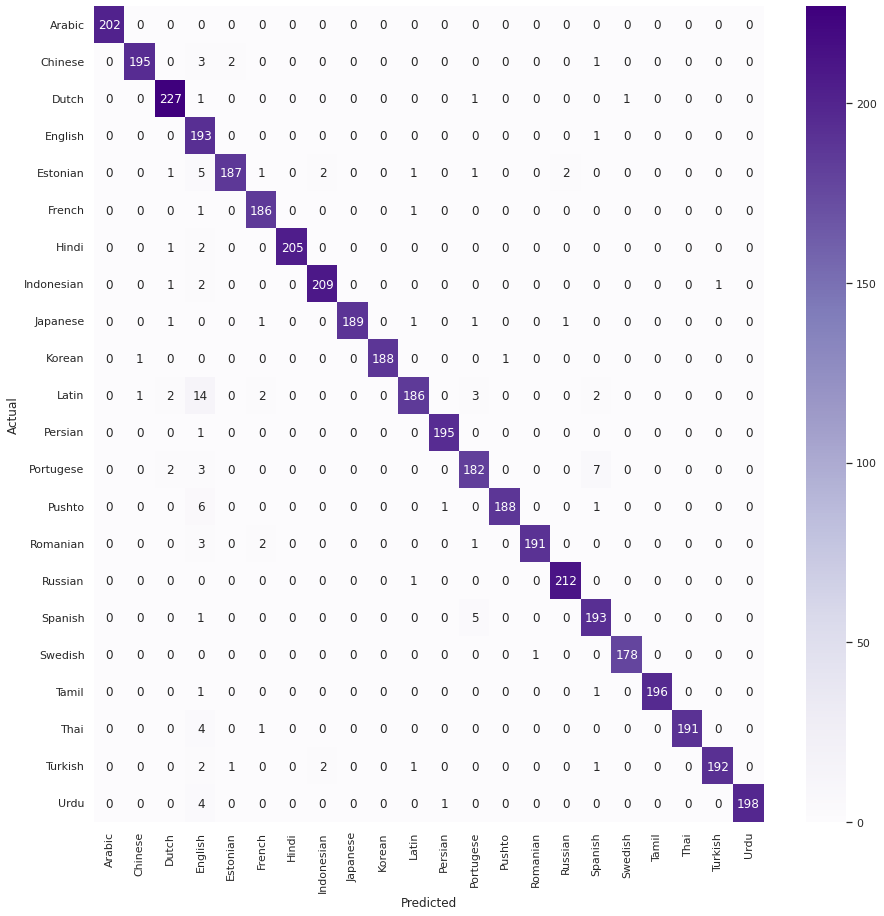

In [ ]:
#top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
y_predict_knn_top1Percent = applyNearestNeighbour(X_top1Percent_train, y_train, X_top1Percent_test)
plot_F_Scores(y_test, y_predict_knn_top1Percent)
plot_Confusion_Matrix(y_test, y_predict_knn_top1Percent, "Purples")

In [ ]:
ac = accuracy_score(y_test, y_predict_knn_top1Percent)
print(ac)

0.9734090909090909
